# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [199]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df=pd.merge(study_results,mouse_metadata, on="Mouse ID", how= 'left')

# Display the data table for preview
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [200]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [201]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = mouse_df[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [202]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [203]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=mouse_df.loc[mouse_df["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [204]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [205]:
mean_tumor_volume=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [206]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_data = clean_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
summary_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

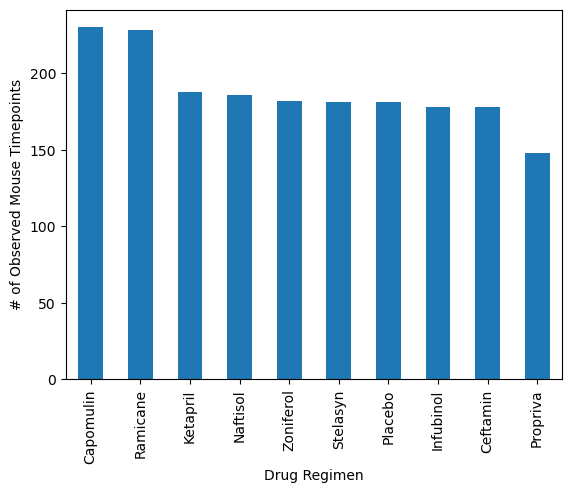

In [207]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts() 
plot_pandas = mice_count.plot.bar(color = 'tab:blue') 
plt.xlabel("Drug Regimen") 
plt.ylabel("# of Observed Mouse Timepoints") 

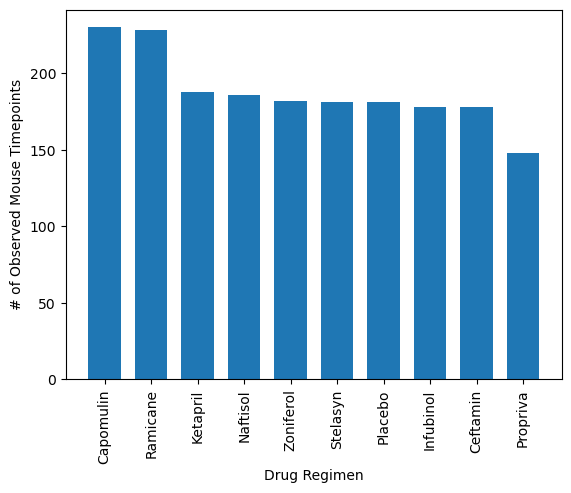

In [208]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color ='tab:blue', 
        width = 0.7, )

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

<Axes: ylabel='count'>

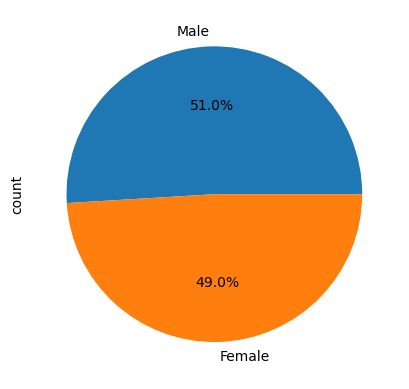

In [209]:
# Count the unique values in the "Sex" column
sex_counts = clean_df["Sex"].value_counts()

# Create a pie chart to show the distribution of sexes
sex_counts.plot.pie(autopct="%1.1f%%")

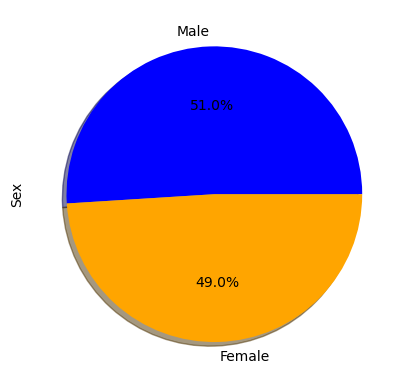

In [210]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [51,49]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0,)
# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [211]:
# Group the data by "Mouse ID" and find the maximum timepoint for each mouse
max_timepoint = mouse_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the grouped data with the original DataFrame to get the final tumor volume for each mouse
final_tumor_volume = pd.merge(max_timepoint, mouse_df, on=['Mouse ID', 'Timepoint'], how='left')

In [212]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Group the data by "Mouse ID" and find the maximum timepoint for each mouse
max_timepoint = mouse_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the grouped data with the original DataFrame to get the final tumor volume for each mouse
final_tumor_volume = pd.merge(max_timepoint, mouse_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the data for the specified treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the final tumor volume of each mouse across the specified treatment regimens
print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [213]:
# Put treatments into a list for for loop (and later for plot labels)
# List of treatment groups
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Loop over each treatment group
for treatment in treatment_groups:
    # Filter the data for the current treatment group
    treatment_data = mouse_df[mouse_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate quartiles
    quartiles = treatment_data.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Display the IQR and outliers for the current treatment group
    print(f"Treatment Group: {treatment}")
    print(f"IQR: {IQR}")
    print("Potential Outliers:")
    print(outliers)
    print()

Treatment Group: Capomulin
IQR: 7.314067135000002
Potential Outliers:
1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

Treatment Group: Ramicane
IQR: 8.325365415
Potential Outliers:
1814    22.050126
Name: Tumor Volume (mm3), dtype: float64

Treatment Group: Infubinol
IQR: 10.002090667500006
Potential Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment Group: Ceftamin
IQR: 9.593010457500007
Potential Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



<Figure size 1000x600 with 0 Axes>

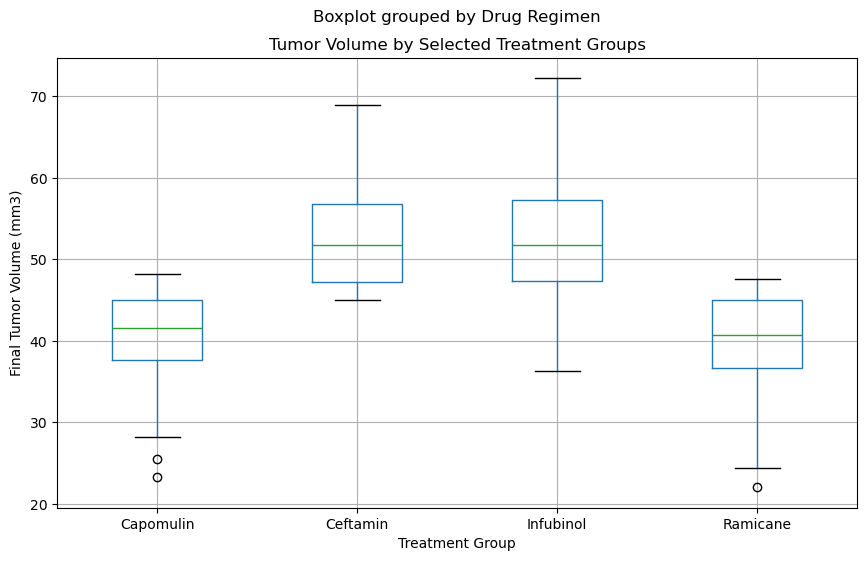

In [214]:
# Filter the DataFrame to include only the specified treatment groups
selected_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = mouse_df[mouse_df['Drug Regimen'].isin(selected_treatments)]

# Create a box plot for the tumor volume data grouped by treatment for the selected treatments
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', figsize=(10, 6))
plt.title('Tumor Volume by Selected Treatment Groups')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

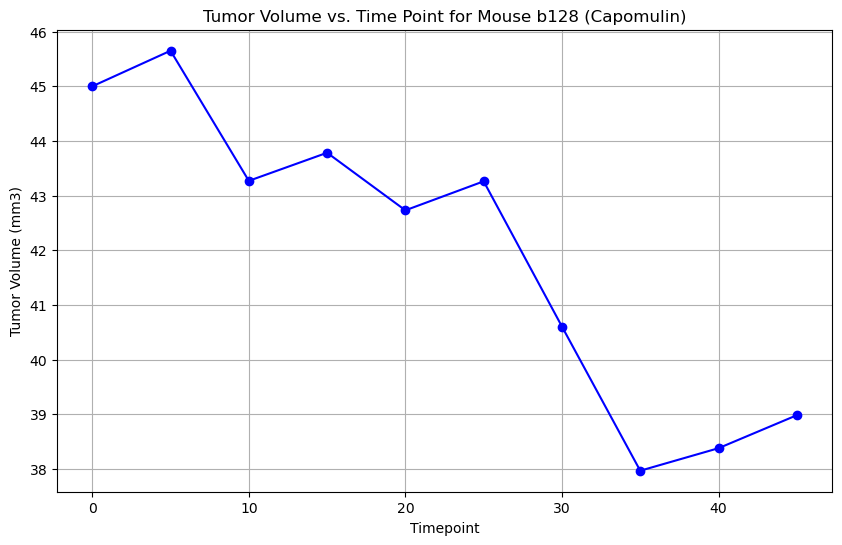

In [215]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for a single mouse treated with Capomulin
mouse_id = 'b128' 
capomulin_mouse_data = mouse_df[(mouse_df['Mouse ID'] == mouse_id) & (mouse_df['Drug Regimen'] == 'Capomulin')]

# Create a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

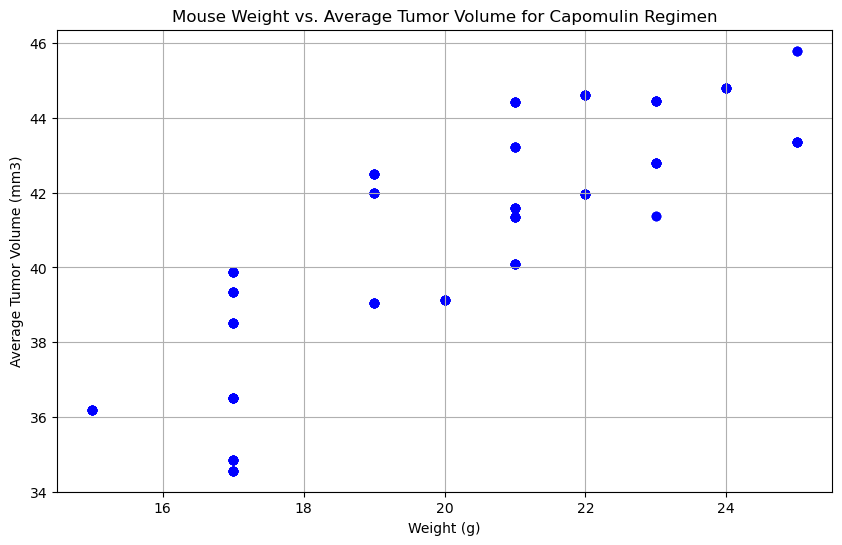

In [216]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the original data to get the mouse weight
merged_data = pd.merge(avg_tumor_volume, capomulin_data, on='Mouse ID')

# Create a scatter plot of mouse weight vs. average tumor volume for the Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_x'], color='b', alpha=0.8)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8343958614425957
Linear Regression Model: Tumor Volume = 0.96 * Mouse Weight + 21.49


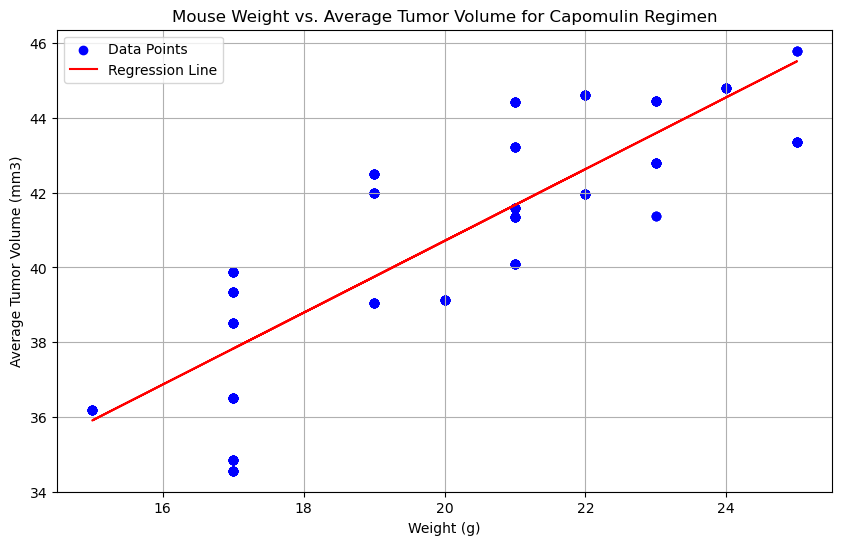

In [226]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the original data to get the mouse weight
merged_data = pd.merge(avg_tumor_volume, capomulin_data, on='Mouse ID')

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coeff = np.corrcoef(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_x'])[0, 1]

# Perform linear regression to model the relationship between mouse weight and average tumor volume
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_x'])

# Output the correlation coefficient and linear regression model
print(f"Correlation Coefficient: {correlation_coeff}")
print(f"Linear Regression Model: Tumor Volume = {slope:.2f} * Mouse Weight + {intercept:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_x'], color='b', label='Data Points')
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='r', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()